In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=  pd.read_csv('C:/Users/User/Desktop/placement/placement.csv')

In [3]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
data.shape

(1000, 3)

In [6]:
data.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

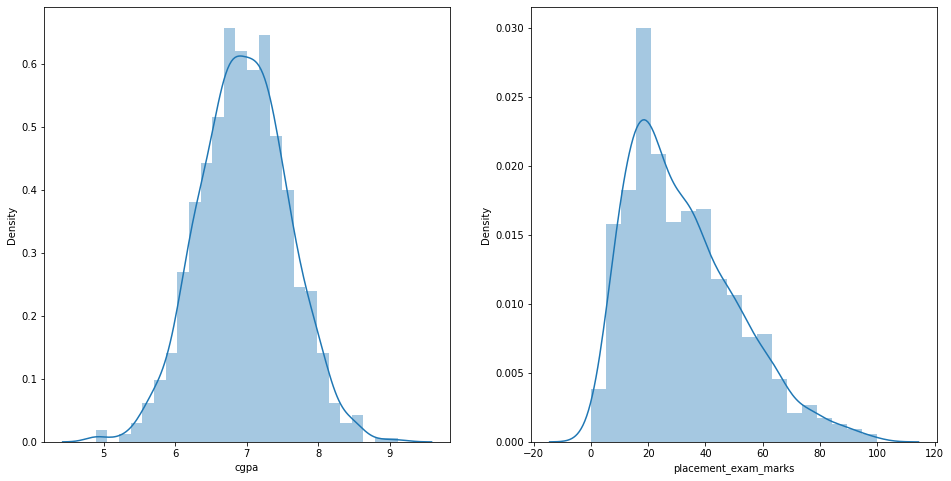

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(data['cgpa'])

plt.subplot(1,2,2)
sns.distplot(data['placement_exam_marks'])

 we deal with the CGPA 
which is a standard normal distribution

In [9]:
data[['cgpa']]

,cgpa
0,7.19
1,7.46
2,7.54
3,6.42
4,7.23
...,...
995,8.87
996,9.12
997,4.89
998,8.62


In [10]:
print('mean value of cgpa = ' , data['cgpa'].mean())
print('standard deviation of cgpa =' , data['cgpa'].std())
print('maximumm value of cgpa =' , data['cgpa'].max())
print('minimum value of cgpa =' , data['cgpa'].min() )

mean value of cgpa =  6.96124000000001
standard deviation of cgpa = 0.6158978751323894
maximumm value of cgpa = 9.12
minimum value of cgpa = 4.89


In [ ]:
# finding the boundary valu

In [14]:
higest_allowed =data['cgpa'].mean() + 3*data['cgpa'].std()  
lowest_allowed =data['cgpa'].mean() - 3*data['cgpa'].std()  

In [15]:
print('higest_allowed =', higest_allowed)

print('lowest_allowed =',lowest_allowed)

higest_allowed = 8.808933625397177
lowest_allowed = 5.113546374602842


In [16]:
data[(data['cgpa'] > higest_allowed) |  (data['cgpa'] < lowest_allowed)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# triming

In [19]:
new_data=data[(data['cgpa'] < higest_allowed) &  (data['cgpa'] > lowest_allowed)]

In [21]:
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [22]:
new_data.shape

(995, 3)

# z-score

In [24]:
data['cgpa_z-score']= (data['cgpa']-data['cgpa'].mean())/ data['cgpa'].std()

In [25]:
data.head()

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [26]:
data[(data['cgpa_z-score'] > 3) | (data['cgpa_z-score'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


#  triming by z-score

In [29]:
new_data=data[(data['cgpa_z-score'] < 3) & (data['cgpa_z-score'] > -3)]

In [31]:
new_data

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# capping

In [34]:
upper_limit= data['cgpa'].mean() + 3*data['cgpa'].std()
lower_limit= data['cgpa'].mean() - 3*data['cgpa'].std()

In [35]:
print('upper_limit is =' , upper_limit)
print('lower_limit is =' , lower_limit)

upper_limit is = 8.808933625397177
lower_limit is = 5.113546374602842


In [40]:
data['cgpa']=np.where(
 data['cgpa']> upper_limit, upper_limit,
np.where(
     data['cgpa']< lower_limit, lower_limit,
    data['cgpa']
)

)

In [42]:
data.shape


(1000, 4)

In [43]:
data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64